# The Submission Notebook for Computer Infracture Module

## Problem 1: Data from yfinance



Before starting this project, I created a Python virtual environment to install the packages required for the Science in Data Analytics program. This approach helps keep the Python packages for different projects separate, preventing conflicts that may arise when different projects require specific package versions. It also avoids dependency incompatibilities, where one script might need one version of a package while another requires a different version.

In [1]:
# Install the yfinace, matplotlib package, if not yet installed
# !pip install yfinance
# !pip install matplotlib

In [2]:
import yfinance as yf # Downlaoding stock price data
from datetime import datetime # Extracting time information from the OS
import pandas as pd # Working with dataframes
from matplotlib import pyplot as plt
#import os # This module provides a portable way of using operating system dependent functionality


In [3]:
# Save the current_time outside the function because you will need it multiple times
current_time = datetime.now().strftime("%Y%m%d-%H%M%S")

def get_data():
    # Explains on how to set parameters for the download function: https://ranaroussi.github.io/yfinance/reference/api/yfinance.Tickers.html#yfinance.Tickers
    # Dowload the faang data for the last five days in one hour intervals
    faang_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')


    # Explains how to get the current time: https://sentry.io/answers/get-the-current-time-in-python/
    # Explains on how to convert the datetime object to a string: https://stackoverflow.com/questions/415511/how-do-i-get-the-current-time-in-python
    # Get the current date and time, then, convert it to a string to use it in naming the csv file
    

    # Define the name of the file to use for saving the df into a csv file in the data folder
    file_name = f"data/{current_time}.csv"

    # Explains how to save pandas df: https://www.geeksforgeeks.org/pandas/saving-a-pandas-dataframe-as-a-csv/
    # Save the faang data as the csv file in the data folder
    faang_data.to_csv(file_name)


In [4]:
get_data()

/tmp/ipykernel_23036/1627770984.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  faang_data = yf.download(["META", "AAPL", "AMZN", "NFLX", "GOOG"], period='5d', interval='1h')
[*********************100%***********************]  5 of 5 completed


## Problem 2: Plotting Data

In [5]:
# Examples on how to load csv file as pandas df while preserving heading and row levels
# Load  the first csv file in the data folder and print the head
df = pd.read_csv(f"data/{current_time}.csv", header=[0, 1], index_col=0)

In [6]:
df.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-17 14:30:00+00:00  269.279999  230.725006  290.899994  607.400024   
2025-11-17 15:30:00+00:00  267.879913  232.419998  288.450012  606.299988   
2025-11-17 16:30:00+00:00  268.920013  233.520004  289.011810  606.849976   
2025-11-17 17:30:00+00:00  267.779999  232.000000  286.299988  604.450012   
2025-11-17 18:30:00+00:00  267.290009  231.399307  285.619904  600.150024   

Price                                        High                          \
Ticker                           NFLX        AAPL        AMZN        GOOG   
Datetime                                                                    
2025-11-17 14:30:00+00:00  111.029999  270.489990  234.600006  294.500000   
2025-11-17 15:30:00+00:00  110.370003  269.390015  232.500000  291.529999   
2025-11-17 16:30:00+00:00  111.209999  269.549988  233.824997  290.359985   
2025-11-17 17:30:00+00:00  110.594704  269.350006  234.029999  289.160004   
2025-11-17 18:30:00+00:00  109.858200  268.339996  232.770004  287.415009   

Price                                              ...        Open  \
Ticker                           META        NFLX  ...        AAPL   
Datetime                                           ...               
2025-11-17 14:30:00+00:00  611.690002  111.849998  ...  268.720001   
2025-11-17 15:30:00+00:00  608.479919  111.370003  ...  269.230011   
2025-11-17 16:30:00+00:00  608.820007  111.470001  ...  267.850006   
2025-11-17 17:30:00+00:00  607.330017  111.289902  ...  268.940002   
2025-11-17 18:30:00+00:00  606.400024  110.809998  ...  267.769989   

Price                                                                      \
Ticker                           AMZN        GOOG        META        NFLX   
Datetime                                                                    
2025-11-17 14:30:00+00:00  232.945007  286.135010  609.034973  110.779999   
2025-11-17 15:30:00+00:00  230.699997  290.899994  607.300110  111.025803   
2025-11-17 16:30:00+00:00  232.449997  288.470490  606.250000  110.369904   
2025-11-17 17:30:00+00:00  233.524399  289.079987  606.799988  111.230003   
2025-11-17 18:30:00+00:00  231.990005  286.290009  604.500000  110.580002   

Price                       Volume                                       
Ticker                        AAPL      AMZN     GOOG     META     NFLX  
Datetime                                                                 
2025-11-17 14:30:00+00:00  8509806  11162624  9825496  2585815  4796429  
2025-11-17 15:30:00+00:00  3379761   6793002  2897454  1127617  2212014  
2025-11-17 16:30:00+00:00  2089997   4128759  2043947   848823  1724155  
2025-11-17 17:30:00+00:00  1923442   2375447  1735483  1142893   997802  
2025-11-17 18:30:00+00:00  2030991   2231460  1551909  1256188  1393752  

[5 rows x 25 columns]

Here, I need to understand how to access the specific data from the pandas DataFrame that will be used for plotting. The goal is to visualise the closing prices of the FAANG stocks over the past five days, using one-hour intervals. The most suitable visualisation for this type of time series data is a line plot, as it allows me to display the closing prices of all five stocks together on a single chart for easy comparison.

In [ ]:
def plot_data():
    # Explains the structure of the panda.Series so that I could access the data from the finance data 
    # that I recently uploaded:https://pandas.pydata.org/docs/reference/api/pandas.Series.index.html#pandas.Series.index.

    # Explains on how to plot multiple lines on the same plot using pyplot: 
    # https://www.geeksforgeeks.org/python/plot-multiple-lines-in-matplotlib/.

    # Plot the plots of the FAANG stocks
    for ticker in ["AAPL", "AMZN", "GOOG", "META", "NFLX"]:
        plt.plot(df.index, df["Close"][ticker], label=ticker)

    # Get the current date to use it as the title for the following plot
    date = datetime.now().strftime("%Y-%m-%d")


    date_ticks = []
    xtick_location = []

    # Add the date in the format ("%b %d") to date_ticks and mark the location in the 
    # list of it in the xtick_location so you use both lists to set xticks on the plot.
    for i in range(0, len(df.index)): # Iterate through all dates in the df.index to generate x axis ticks at the start of each day

        # Explains on how to use strptime to convert a date in a string format to the datetime object so that later you could access
        # different types of date formats: https://docs.python.org/3/library/datetime.html#datetime.datetime.strftime
        # Convert each date in a string format to a datetime object 
        when = datetime.strptime(df.index[i], "%Y-%m-%d %H:%M:%S%z")
        # Access the month and day info from the when variable in a 
        month_day = when.strftime("%b %d") # %b - the first three month letters, %d - the day of the month represented as two digits
        # Add the date in the format "%b %d" if it is unique value in the date_ticks variable
        # Also, add the location from the df.index object of this first unique variable to the xtick_location variable
        if month_day not in date_ticks:
            date_ticks.append(month_day)
            xtick_location.append(i)


    plt.legend()
    plt.title(f"{date}")
    plt.xlabel("Datetime")
    # Explains on how to change xtick arrangement: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
    plt.xticks(xtick_location, date_ticks) # The x ticks are divided by date and the tick indicates the first value of the day
    plt.ylabel("An Hourly Stock Closing Price")
    plt.legend(bbox_to_anchor=(1.25, 1)) # Set the legend cordinates outside the plot for better presentation
    # Explains how to save pyplot figures: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html
    # Save the plot in the plots folder
    plt.savefig(f"plots/{current_time}.png", dpi=300, bbox_inches="tight")

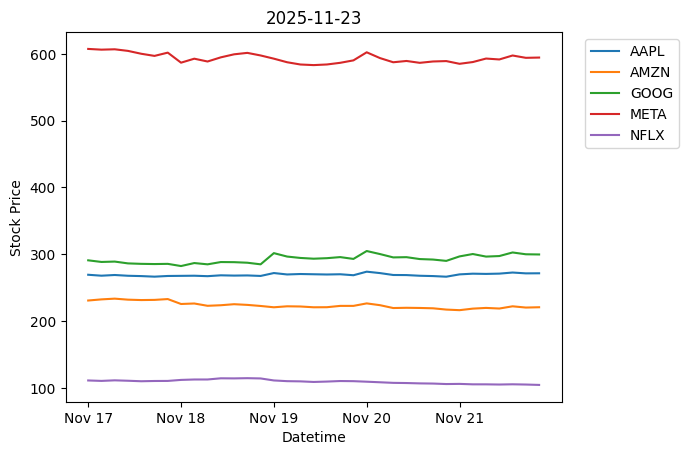

In [7]:
plot_data()

## Problem 3: Script

In this task, I will create a Python script called faang.py that executes the code above to download the current data for five FAANG stocks. It will then plot their closing prices in one-hour intervals over the last five days.

First, I will create the file ./faang.py in VS Code by copying the script from this notebook into that file. Then, I will add a Python shebang line at the top:

#!/usr/local/bin/python3

(Reference: https://stackoverflow.com/questions/6908143/should-i-put-shebang-in-python-scripts-and-what-form-should-it-take)

Next, I will make the file executable using the chmod command, which controls file permissions. The +x parameter marks the file as executable:

chmod +x ./faang.py

(Reference: https://cets.seas.upenn.edu/answers/chmod.html#:~:text=The%20chmod%20(short%20for%20change,execute%20(x)))

Finally, I will run the script with:

./faang.py


## Problem 4: Automation

1. Workflow Location

Every GitHub Actions workflow must be stored in the following directory of the repository:

./.github/workflows/


This path must match exactly. If the folder structure or file placement is incorrect, GitHub will not detect the workflow.

Inside this folder, you create ythe our workflow script and save it with a .yml or .yaml extension.

2. Structure of a Workflow File

A GitHub Actions .yml file must follow a specific structure. The essential components are:

name – the workflow’s human-readable name

on – the events or schedule that trigger the workflow

jobs – the list of jobs that the workflow will run

runs-on – the operating system for each job

steps – the actions or commands executed within each job

Other components are optional but sometimes necessary depending on what you want to accomplish.

In my workflow, I use all five essential components, plus one additional field—permissions. Although permissions is optional, in this case it is required because I want the workflow to be able to write the output of the faang.py script back to the repository. Without this permission, the workflow would fail when attempting to push changes.

3. Explanation of the Workflow Components
1) Name of the Workflow
```
name: Scheduled Workflow
```

This is simply the display name of the workflow.

2) Trigger (on)
```
on:
  schedule:
    - cron: '00 08 * * 6'  # Runs every Saturday at 08:00 UTC
```

This section defines when the workflow runs.
In this case, it is triggered by a weekly schedule (cron format).
Other triggers include events such as push, pull_request, or manual execution via workflow_dispatch.

3) Permissions
```
permissions:
  contents: write
```

This workflow needs write access to the repository because it will commit and push the output generated by faang.py. Without this permission, GitHub Actions would not allow the workflow to modify the repository content.

4) Jobs
```
jobs:
  plot_stock_price:
```

A workflow may contain multiple jobs, and they can run sequentially or in parallel.
Here, we define a single job called plot_stock_price.

5) Runner (runs-on)
```
  runs-on: ubuntu-latest
```

This specifies the virtual machine operating system on which the job will run. GitHub provides Linux, Windows, and macOS runners.
In this case, we use Ubuntu.

6) Steps
```
    steps:
```

Each job contains a sequence of steps.
These represent the actual commands or actions needed to complete the workflow.

This workflow includes five key steps:

Step 1 – Check out the repository
```
- name: checkout repo content
  uses: actions/checkout@v4
```

This copies the repository content into the temporary virtual environment created for the workflow run.

Step 2 – Set up Python
```
- name: setup python
  uses: actions/setup-python@v5
  with:
    python-version: '3.9'
```

This installs and configures the required Python version.

Step 3 – Install dependencies
```
- name: install python packages
  run: |
    python -m pip install --upgrade pip
    pip install -r requirements.txt
```

All required Python packages are installed so that faang.py can run successfully.

Step 4 – Run the script
```
- name: run faang.py
  run: |
    python3 faang.py
```

This executes Python script that generates plots or other output files.

Step 5 – Commit and push results
```
- name: Commit report
  run: |
    git config user.name "github-actions[bot]"
    git config user.email "github-actions[bot]@users.noreply.github.com"
    git add .
    git commit -am "Automated plots and data"
    git push origin main
```

GitHub Actions runners are temporary environments.
Any files created by faang.py exist only during the workflow run.
To save them permanently, the workflow must commit and push the results back to the repository.
This final step ensures that the output is not lost.